In [46]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
current_directory = os.getcwd()                                    # Current Wokring Directory
print("Current working directory:", current_directory)

Current working directory: E:\Hackathon\NGCM


In [15]:
os.chdir(r'E:\Hackathon\NGCM')                                     # Change to a new directory (replace with your desired path)
print("Current directory AFTER change:", os.getcwd())              # Verify the change

Current directory AFTER change: E:\Hackathon\NGCM


In [16]:
file_path = 'NGCM.csv'                                             # Input CSV file name
geochem_df = pd.read_csv(file_path)                                # Variable to store geochemical database
print("First 5 rows of the dataset:")
print(geochem_df.head(5))

First 5 rows of the dataset:
   Longitude   Latitude  Si02_%  Al2O3_%  Fe2O3_%  TiO2_%  CaO_%  MgO_%  \
0  77.194444  15.599099   60.03    11.96     4.81    0.81   3.03   1.93   
1  77.212963  15.599099   58.85    11.96     4.91    0.79   4.39   2.26   
2  77.231481  15.599099   65.12    11.06     4.33    0.70   3.82   1.87   
3  77.250000  15.599099   65.63    10.94     4.88    0.81   2.74   1.98   
4  77.009259  15.617117   54.15    12.38     4.98    0.78   6.38   2.14   

   MnO_%  Na2O_%  ...  Hf_ppm  Ta_ppm  W_ppm  U_ppm  Pt_ppb  Pd_ppb  In_ppm  \
0   0.13    0.80  ...  13.080   1.074    2.5  4.020     0.0     0.0     0.0   
1   0.15    0.39  ...   9.858   0.912    2.5  2.283     0.0     0.0     0.0   
2   0.13    0.71  ...  16.747   0.954    2.5  3.582     0.0     0.0     0.0   
3   0.14    0.49  ...  19.809   0.912    2.5  3.298     0.0     0.0     0.0   
4   0.12    0.50  ...   9.933   0.739    2.5  1.705     0.0     0.0     0.0   

   F_ppm  Te_ppm  Tl_ppm  
0    0.0     0.0  

In [17]:
print("\nInformation about the dataset:")
geochem_df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 53 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  10004 non-null  float64
 1   Latitude   10004 non-null  float64
 2   Si02_%     10004 non-null  float64
 3   Al2O3_%    10004 non-null  float64
 4   Fe2O3_%    10004 non-null  float64
 5   TiO2_%     10004 non-null  float64
 6   CaO_%      10004 non-null  float64
 7   MgO_%      10004 non-null  float64
 8   MnO_%      10004 non-null  float64
 9   Na2O_%     10004 non-null  float64
 10  K2O_%      10004 non-null  float64
 11  P2O5_%     10004 non-null  float64
 12  Ba_ppm     10004 non-null  float64
 13  Ga_ppm     10004 non-null  float64
 14  Sc_ppm     10004 non-null  float64
 15  V_ppm      10004 non-null  float64
 16  Th_ppm     10004 non-null  float64
 17  Pb_ppm     10004 non-null  float64
 18  Ni_ppm     10004 non-null  float64
 19  Co_ppm     100

In [18]:
if geochem_df.shape[1] >= 2:
    longitude_col = geochem_df.columns[0]                                      # Assigning Latitude and Longitude and Filtering Element Columns
    latitude_col = geochem_df.columns[1]
    print(f"Longitude column assigned to: {longitude_col}")
    print(f"Latitude column assigned to: {latitude_col}")
    element_columns = geochem_df.columns[2:].tolist()                          # Create a list of geochemical element columns by excluding the first two
    print(f"\nGeochemical element columns to be processed: {element_columns}")
else:
    print("Error: DataFrame has less than two columns. Please ensure Latitude and Longitude are present.")

Longitude column assigned to: Longitude
Latitude column assigned to: Latitude

Geochemical element columns to be processed: ['Si02_%', 'Al2O3_%', 'Fe2O3_%', 'TiO2_%', 'CaO_%', 'MgO_%', 'MnO_%', 'Na2O_%', 'K2O_%', 'P2O5_%', 'Ba_ppm', 'Ga_ppm', 'Sc_ppm', 'V_ppm', 'Th_ppm', 'Pb_ppm', 'Ni_ppm', 'Co_ppm', 'Rb_ppm', 'Sr_ppm', 'Y_ppm', 'Zr_ppm', 'Nb_ppm', 'Cr_ppm', 'Cu_ppm', 'Zn_ppm', 'Au_ppb', 'Li_ppm', 'Cs_ppm', 'As_ppm', 'Sb_ppm', 'Bi_ppm', 'Se_ppm', 'Ag_ppb', 'Cd_ppb', 'Hg_ppb', 'Be_ppm', 'Ge_ppm', 'Mo_ppm', 'Sn_ppm', 'TREE', 'Hf_ppm', 'Ta_ppm', 'W_ppm', 'U_ppm', 'Pt_ppb', 'Pd_ppb', 'In_ppm', 'F_ppm', 'Te_ppm', 'Tl_ppm']


In [19]:
for element in element_columns:
    geochem_df[element] = pd.to_numeric(geochem_df[element], errors='coerce')  # Converting the column to numeric first
    geochem_df[element] = geochem_df[element].replace(0, np.nan)               # Using np.nan for changing 0 to null.

print("\nNon-null counts in element columns after treating '0' as missing:")   # Verify the change in non-null counts for the element columns
print(geochem_df[element_columns].isnull().sum())

print("\nInformation about the dataset (element columns):")                    # Optionally, check the overall info again
geochem_df[element_columns].info()


Non-null counts in element columns after treating '0' as missing:
Si02_%        9
Al2O3_%       9
Fe2O3_%       9
TiO2_%        9
CaO_%        64
MgO_%       124
MnO_%         9
Na2O_%        9
K2O_%         9
P2O5_%        9
Ba_ppm        9
Ga_ppm        9
Sc_ppm      398
V_ppm         9
Th_ppm       15
Pb_ppm       20
Ni_ppm       10
Co_ppm        9
Rb_ppm        9
Sr_ppm      116
Y_ppm         9
Zr_ppm      111
Nb_ppm      104
Cr_ppm        9
Cu_ppm       10
Zn_ppm        9
Au_ppb     3917
Li_ppm     3847
Cs_ppm     4297
As_ppm     4201
Sb_ppm     4393
Bi_ppm     4447
Se_ppm     4240
Ag_ppb     4695
Cd_ppb     4075
Hg_ppb     3846
Be_ppm       14
Ge_ppm       11
Mo_ppm     4439
Sn_ppm     1693
TREE         11
Hf_ppm       12
Ta_ppm       34
W_ppm      4440
U_ppm        38
Pt_ppb     8397
Pd_ppb     8489
In_ppm     9808
F_ppm      9808
Te_ppm     9808
Tl_ppm     9808
dtype: int64

Information about the dataset (element columns):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000

In [20]:
total_rows = len(geochem_df)                                                 # Calculate and display the null percentage for each element column
null_counts = geochem_df[element_columns].isnull().sum()
null_percentages = (null_counts / total_rows) * 100

print("\nNull percentage for each geochemical element column:")
print(null_percentages)


Null percentage for each geochemical element column:
Si02_%      0.089964
Al2O3_%     0.089964
Fe2O3_%     0.089964
TiO2_%      0.089964
CaO_%       0.639744
MgO_%       1.239504
MnO_%       0.089964
Na2O_%      0.089964
K2O_%       0.089964
P2O5_%      0.089964
Ba_ppm      0.089964
Ga_ppm      0.089964
Sc_ppm      3.978409
V_ppm       0.089964
Th_ppm      0.149940
Pb_ppm      0.199920
Ni_ppm      0.099960
Co_ppm      0.089964
Rb_ppm      0.089964
Sr_ppm      1.159536
Y_ppm       0.089964
Zr_ppm      1.109556
Nb_ppm      1.039584
Cr_ppm      0.089964
Cu_ppm      0.099960
Zn_ppm      0.089964
Au_ppb     39.154338
Li_ppm     38.454618
Cs_ppm     42.952819
As_ppm     41.993203
Sb_ppm     43.912435
Bi_ppm     44.452219
Se_ppm     42.383047
Ag_ppb     46.931228
Cd_ppb     40.733707
Hg_ppb     38.444622
Be_ppm      0.139944
Ge_ppm      0.109956
Mo_ppm     44.372251
Sn_ppm     16.923231
TREE        0.109956
Hf_ppm      0.119952
Ta_ppm      0.339864
W_ppm      44.382247
U_ppm       0.379848
P

In [21]:
elements_with_low_null = null_percentages[null_percentages < 50].index.tolist()   # Selecting elements with less than 50% null values
if elements_with_low_null:
    low_null_elements_df = geochem_df[elements_with_low_null].copy()              # Create a new DataFrame with only these selected elements

    print("Elements with less than 50% null values:")
    print(elements_with_low_null)
    print("\nDataFrame containing only these elements for further EDA:")
    print(low_null_elements_df.head())                                            # Display the first few rows of the new DataFrame
    print("\nShape of the new DataFrame:", low_null_elements_df.shape)
else:
    print("No elements found with less than 50% null values based on the criteria.")
                                           
eda_df = low_null_elements_df                                                     # Store this DataFrame for subsequent EDA
print("\nDataFrame 'eda_df' created for subsequent EDA steps.")

Elements with less than 50% null values:
['Si02_%', 'Al2O3_%', 'Fe2O3_%', 'TiO2_%', 'CaO_%', 'MgO_%', 'MnO_%', 'Na2O_%', 'K2O_%', 'P2O5_%', 'Ba_ppm', 'Ga_ppm', 'Sc_ppm', 'V_ppm', 'Th_ppm', 'Pb_ppm', 'Ni_ppm', 'Co_ppm', 'Rb_ppm', 'Sr_ppm', 'Y_ppm', 'Zr_ppm', 'Nb_ppm', 'Cr_ppm', 'Cu_ppm', 'Zn_ppm', 'Au_ppb', 'Li_ppm', 'Cs_ppm', 'As_ppm', 'Sb_ppm', 'Bi_ppm', 'Se_ppm', 'Ag_ppb', 'Cd_ppb', 'Hg_ppb', 'Be_ppm', 'Ge_ppm', 'Mo_ppm', 'Sn_ppm', 'TREE', 'Hf_ppm', 'Ta_ppm', 'W_ppm', 'U_ppm']

DataFrame containing only these elements for further EDA:
   Si02_%  Al2O3_%  Fe2O3_%  TiO2_%  CaO_%  MgO_%  MnO_%  Na2O_%  K2O_%  \
0   60.03    11.96     4.81    0.81   3.03   1.93   0.13    0.80   1.60   
1   58.85    11.96     4.91    0.79   4.39   2.26   0.15    0.39   0.77   
2   65.12    11.06     4.33    0.70   3.82   1.87   0.13    0.71   1.37   
3   65.63    10.94     4.88    0.81   2.74   1.98   0.14    0.49   1.02   
4   54.15    12.38     4.98    0.78   6.38   2.14   0.12    0.50   1.26   

   P2O


Calculating correlation matrix for 45 elements...
Plotting annotated correlation heatmap...

Annotated correlation heatmap saved as correlation_matrix.png


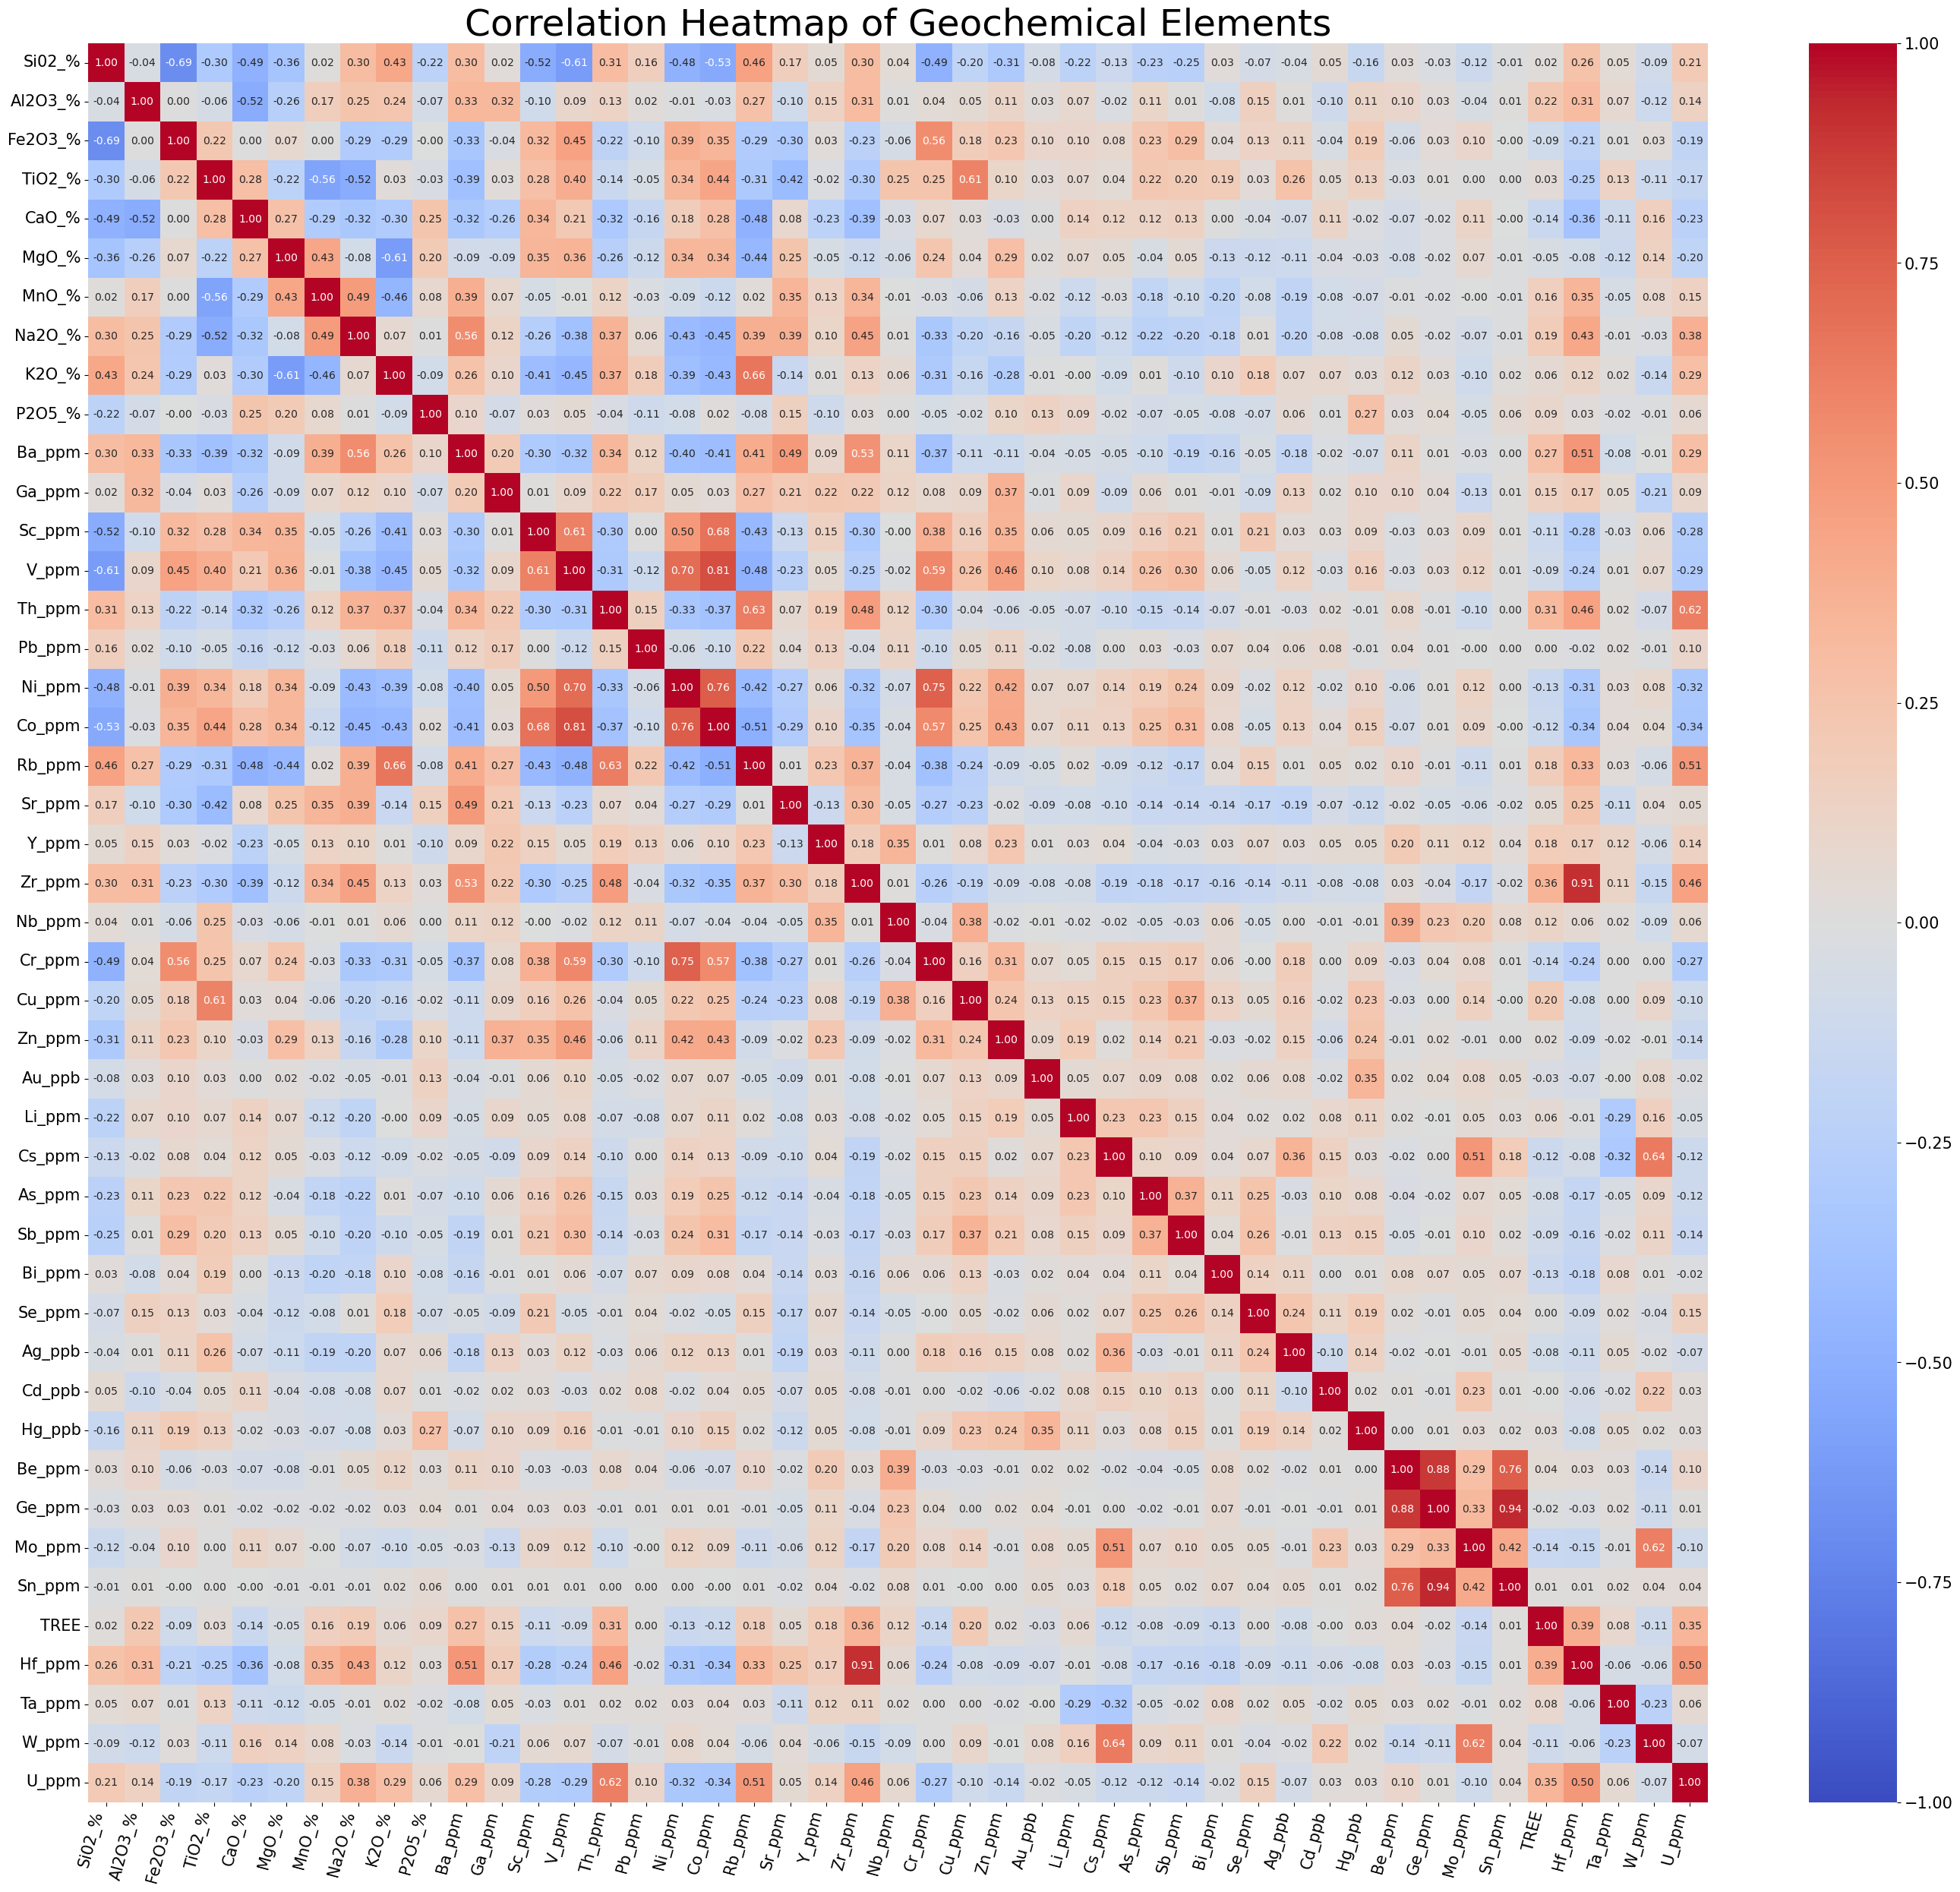

In [32]:
if 'eda_df' in locals() and eda_df is not None:
    all_geochem_elements_for_heatmap = eda_df.columns.tolist()               # Define the list of columns for the correlation matrix
    df_for_correlation_heatmap = eda_df.copy()                               # Using eda_df directly  
    if not df_for_correlation_heatmap.empty:                                 # Check if the DataFrame is not empty
        print(f"\nCalculating correlation matrix for {len(all_geochem_elements_for_heatmap)} elements...")
        correlation_matrix = df_for_correlation_heatmap.corr()

        print("Plotting annotated correlation heatmap...")
        plt.figure(figsize=(28, 25))
        ax = sns.heatmap(correlation_matrix,
                         annot=True,
                         cmap='coolwarm',
                         vmin=-1,
                         vmax=1,
                         fmt=".2f",
                         annot_kws={"size": 10})
       
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=15) # Adjust this value as needed for the colorbar ticks
        plt.title('Correlation Heatmap of Geochemical Elements', fontsize=35)
        plt.xticks(rotation=75, ha='right', fontsize=15)                      # Increased x-tick font size
        plt.yticks(rotation=0, fontsize=15)                                   # Increased y-tick font size
        plt.tight_layout(pad=1.0)
        heatmap_file = 'correlation_matrix.png'
        try:
            plt.savefig(heatmap_file, dpi=300, bbox_inches='tight')
            print(f"\nAnnotated correlation heatmap saved as {heatmap_file}")
        except Exception as e:
            print(f"Error saving heatmap: {e}")
        plt.show()
    else:
        print("Failed to create DataFrame for correlation (df_for_correlation_heatmap) or it's empty.")
else:
    print("DataFrame 'eda_df' not found. Please ensure the previous cells were run.")

Combined histograms saved to: combined_histograms.png


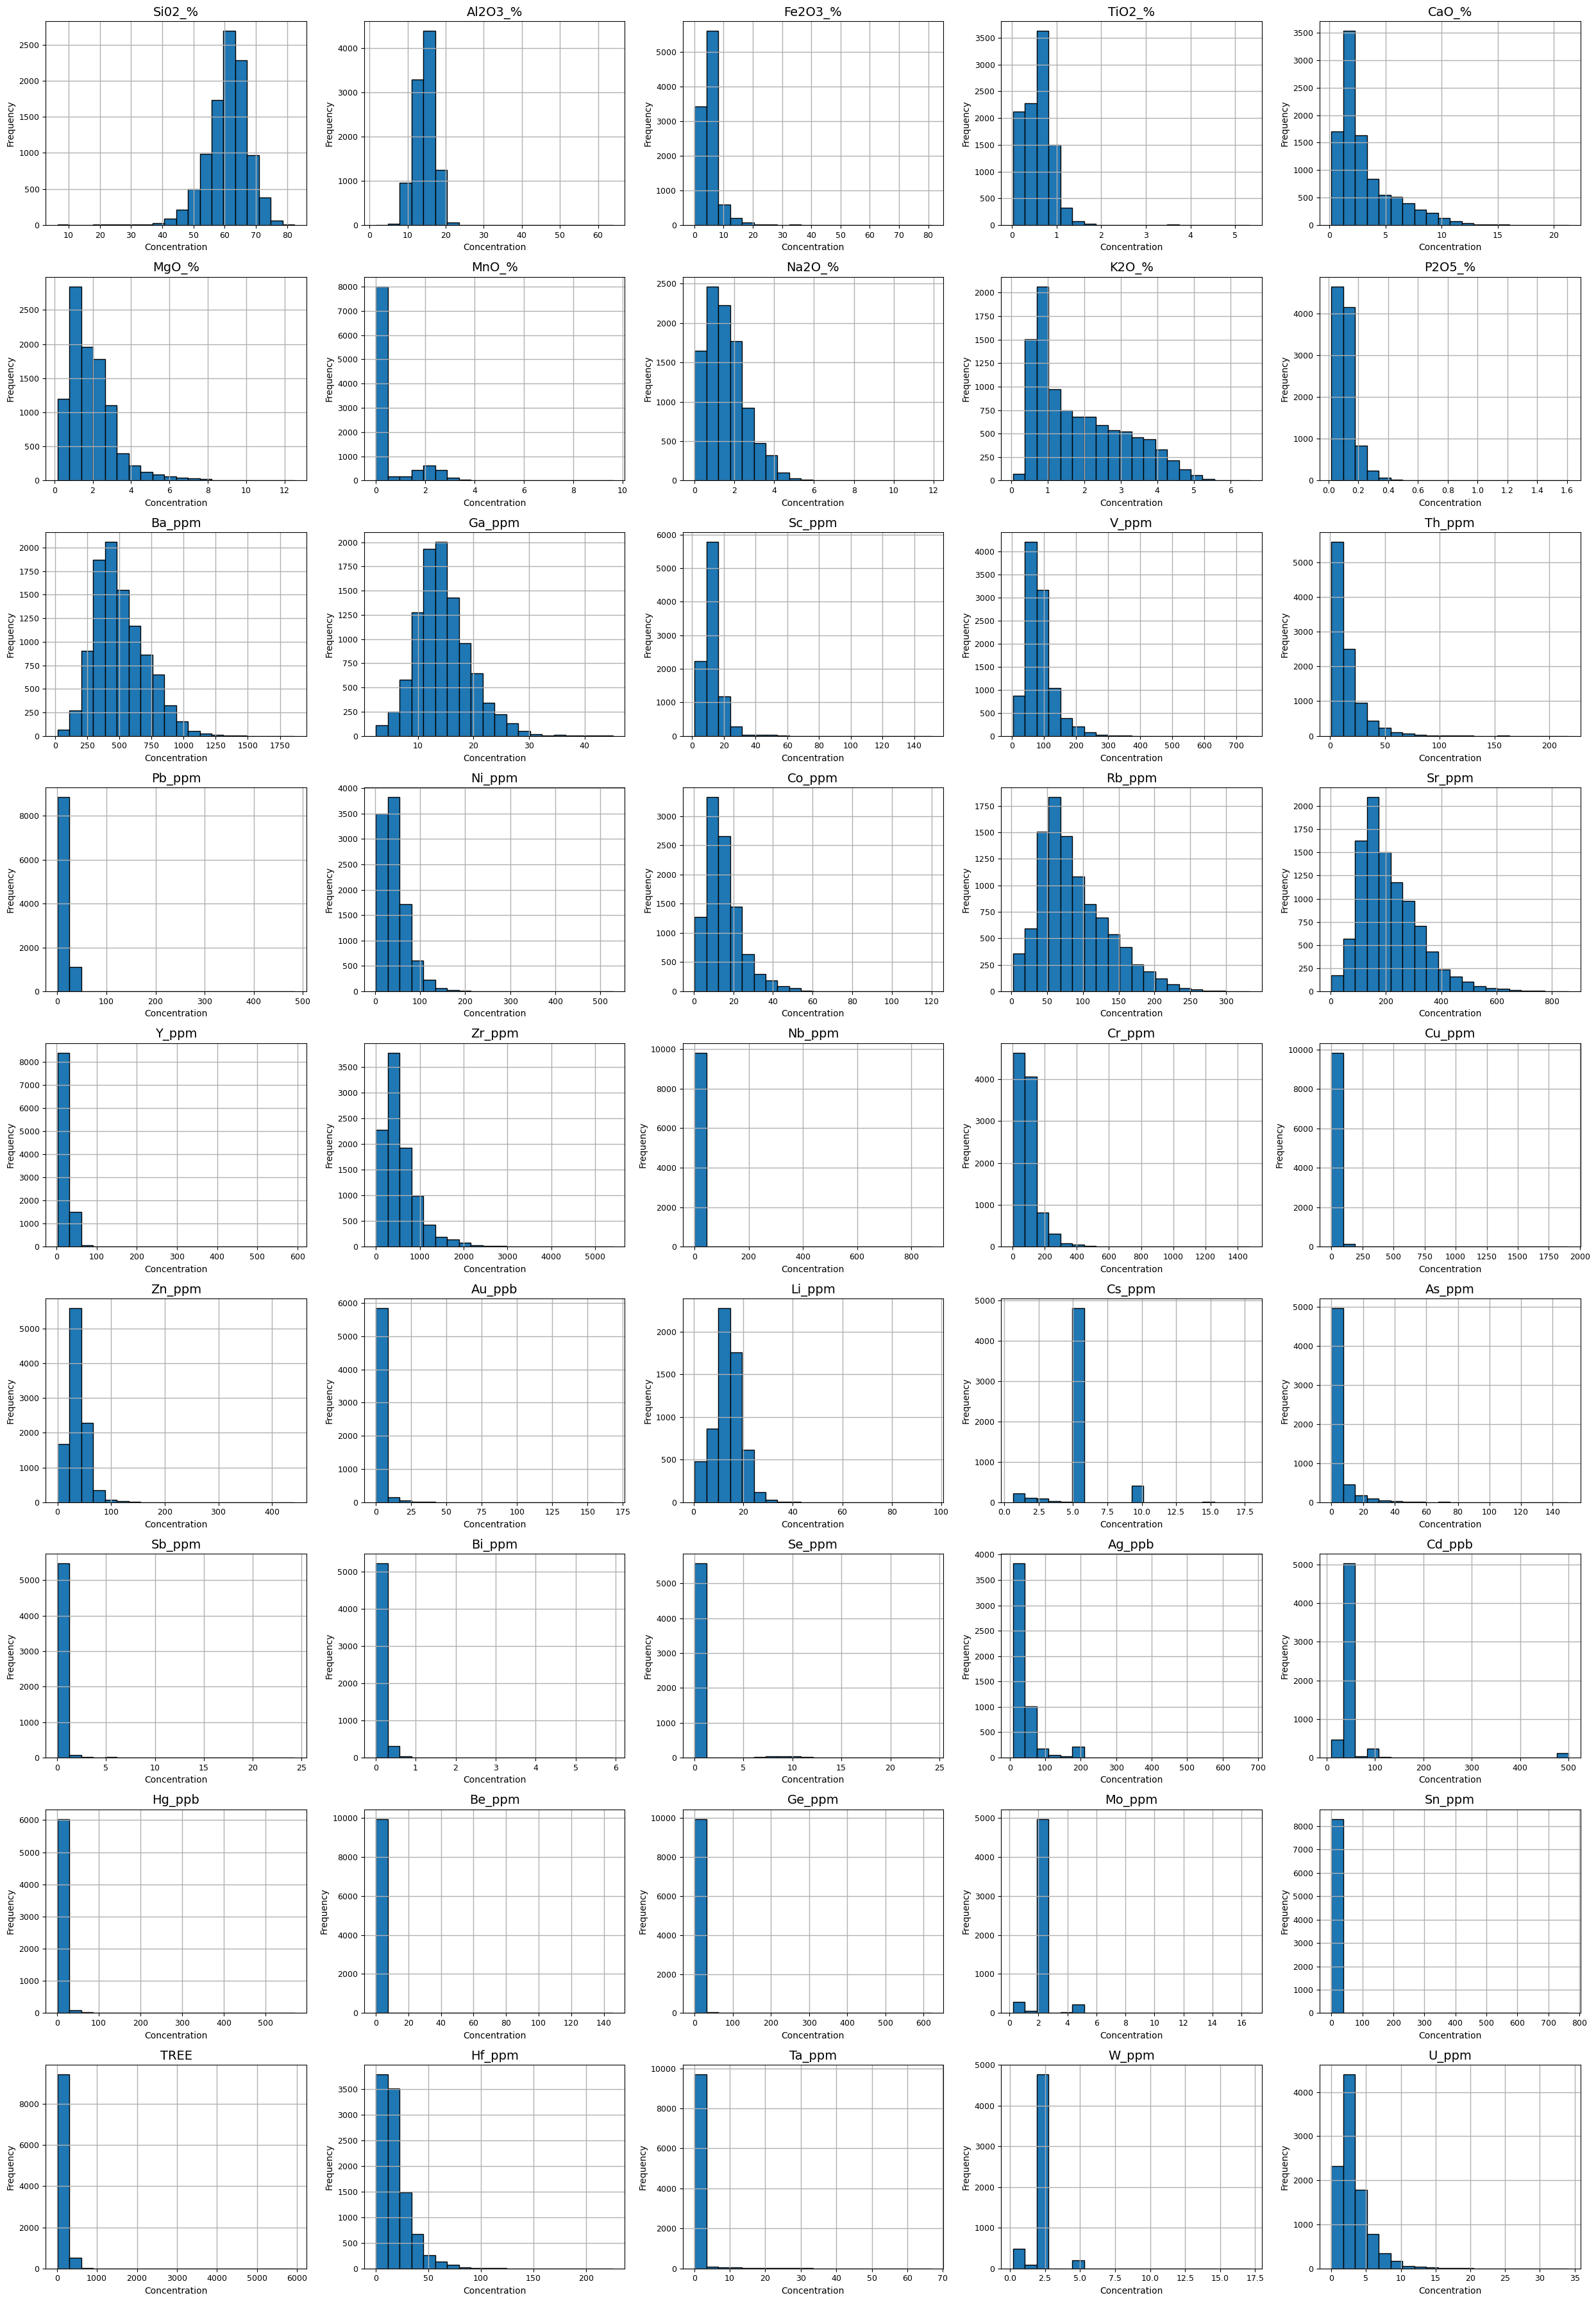

In [34]:
file_path = 'combined_histograms.png'  # REPLACE with your desired file name you want to save the combined histogram image

num_elements = len(eda_df.columns)
if num_elements > 0:
    num_rows = int(np.ceil(num_elements / 5))
    num_cols = min(num_elements, 5) # Ensure no more than 5 columns

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows)) # Adjust figure size as needed
    axes = axes.flatten() # Flatten the axes array for easy indexing

    for i, column in enumerate(eda_df.columns):
        ax = axes[i]
        ax.hist(eda_df[column].dropna(), bins=20, edgecolor='black') # Adjusted bins
        ax.set_title(column, fontsize=14) # Smaller title font
        ax.set_xlabel('Concentration', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=9) # Smaller tick labels
        ax.grid(True, linewidth=1)

    # Remove any unused subplots if the number of elements is not a multiple of 5
    if num_elements < num_rows * num_cols:
        for i in range(num_elements, num_rows * num_cols):
            fig.delaxes(axes[i])

    plt.tight_layout()

    try:
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
        print(f"Combined histograms saved to: {file_path}")
    except Exception as e:
        print(f"Error saving combined histograms: {e}")

    plt.show()

else:
    print("No elements in the eda_df to plot histograms.")

Combined box plots saved to: combined_boxplots.png


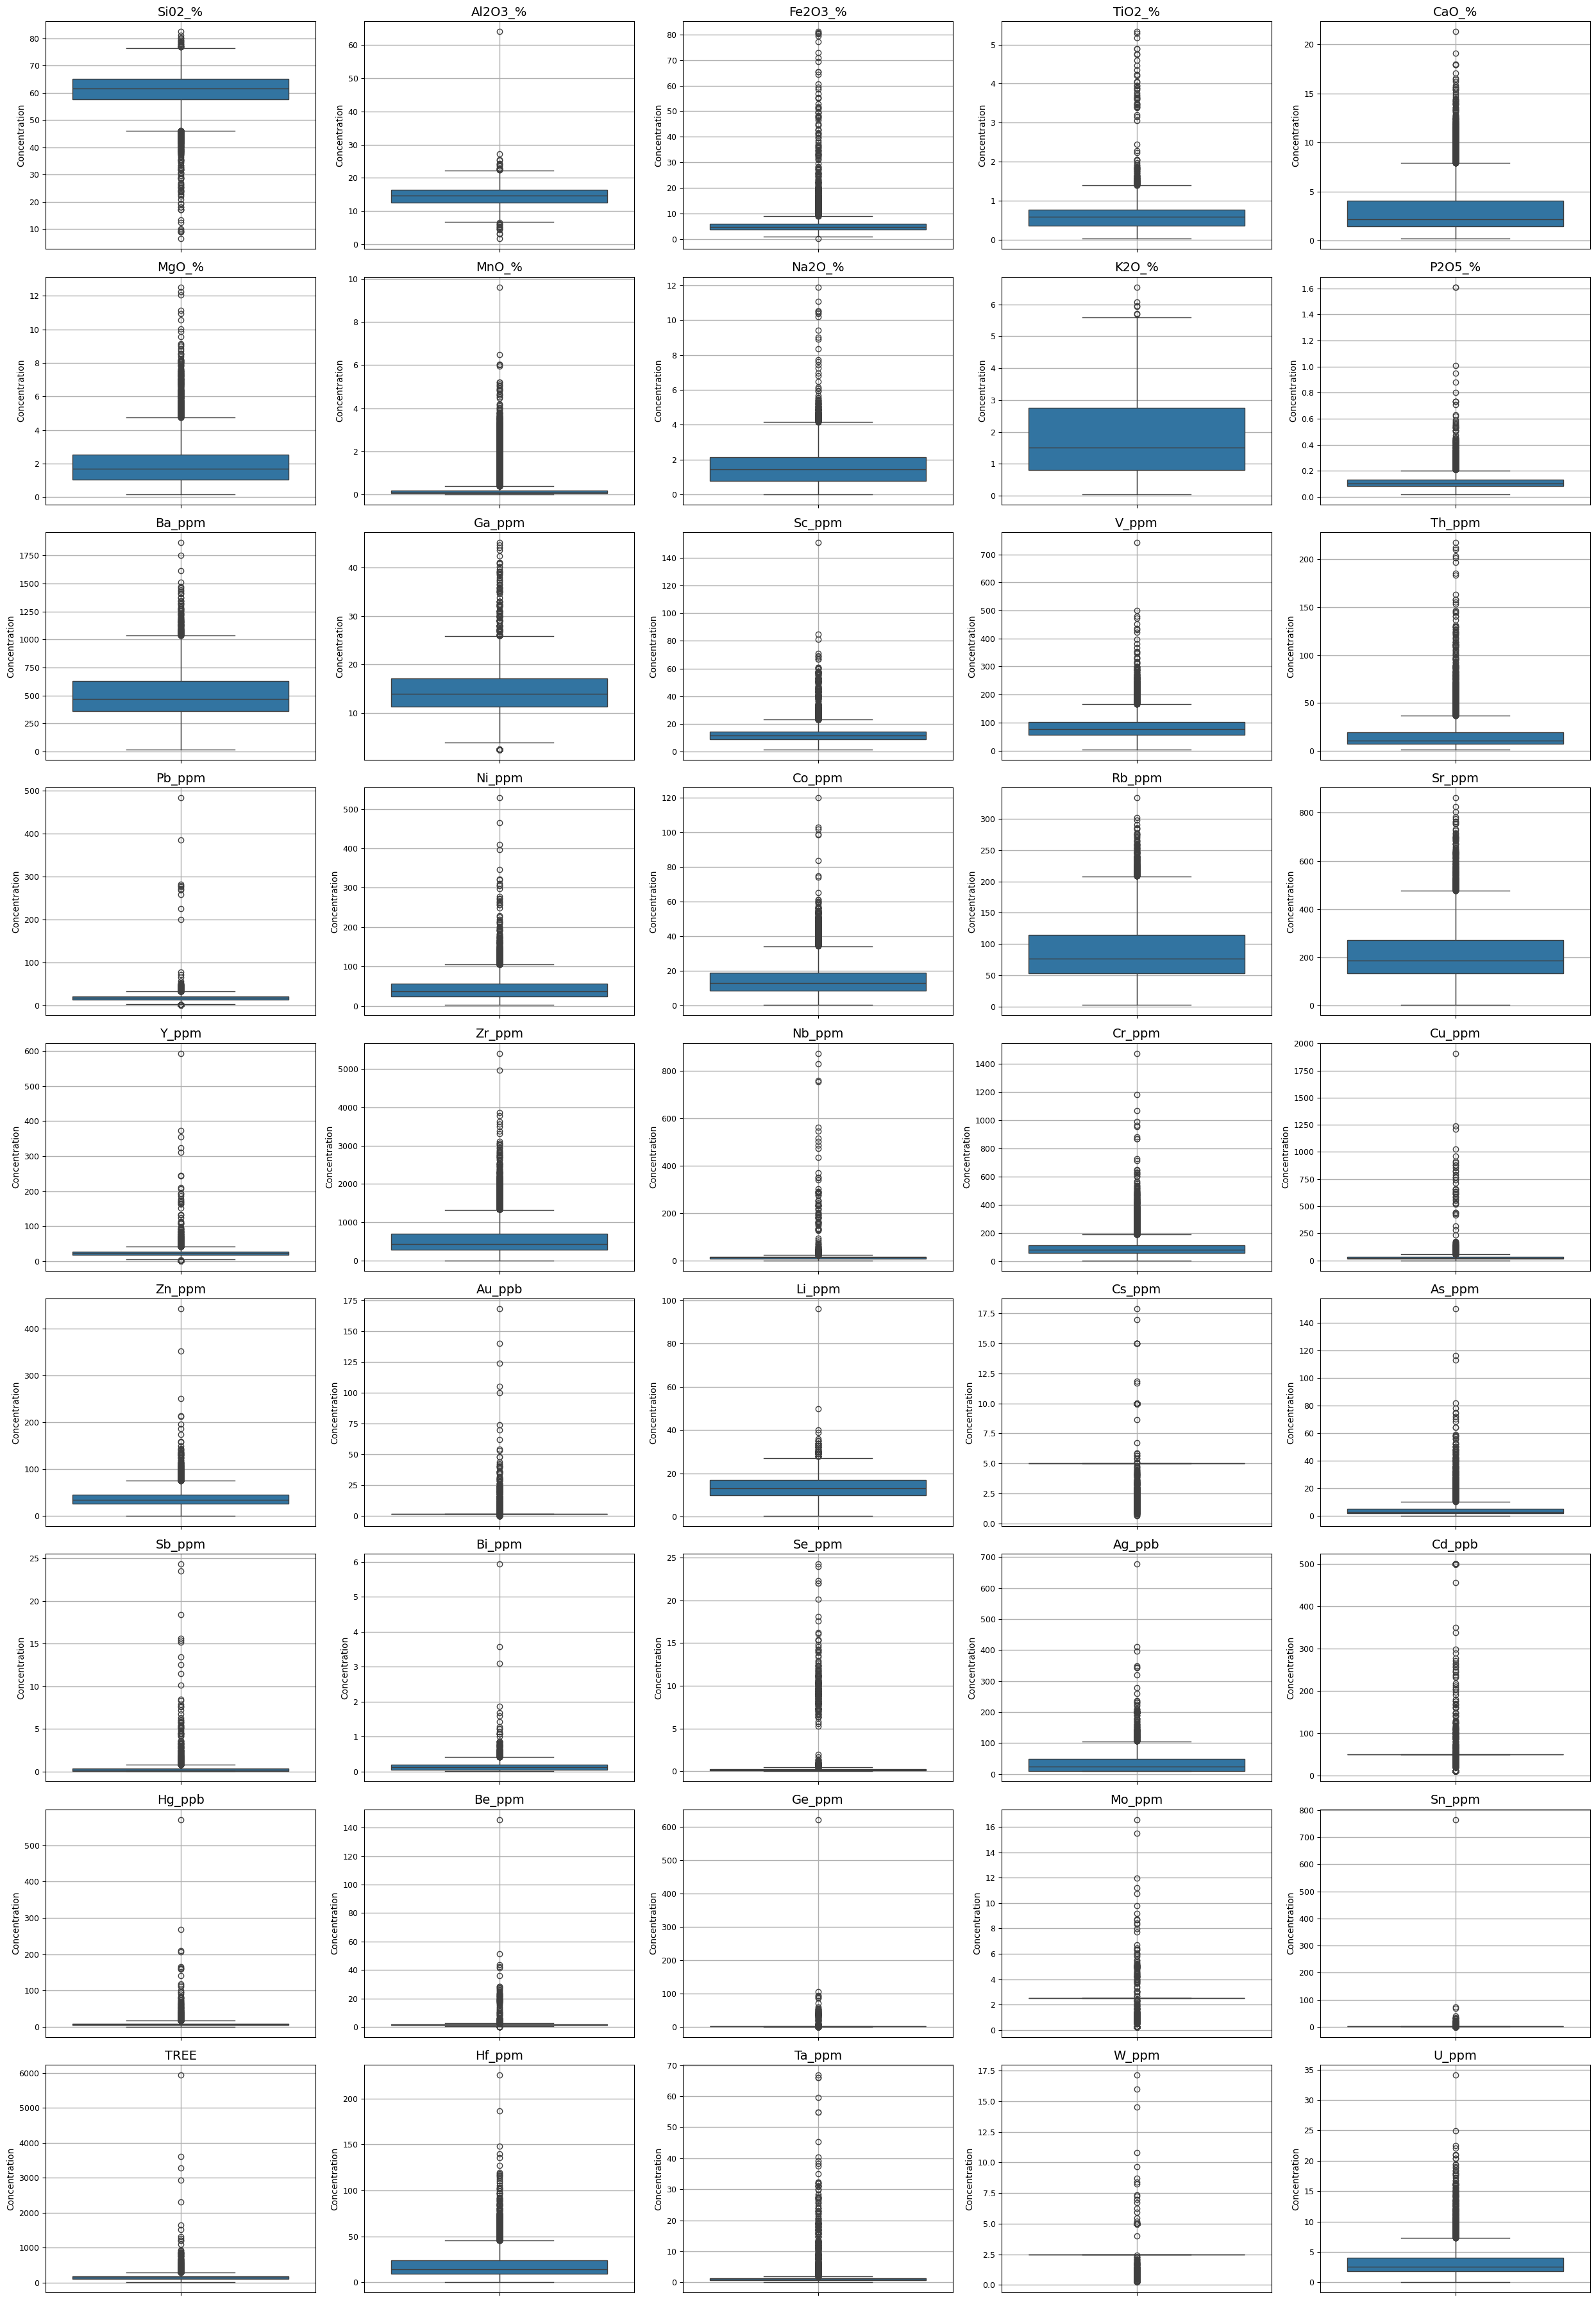

In [35]:
file_path = 'combined_boxplots.png'            # REPLACE with your desired file name you want to save the combined box plot image

num_elements = len(eda_df.columns)
if num_elements > 0:
    num_rows = int(np.ceil(num_elements / 5))
    num_cols = min(num_elements, 5) # Ensure no more than 5 columns

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows)) # Adjust figure size as needed
    axes = axes.flatten() # Flatten the axes array for easy indexing

    for i, column in enumerate(eda_df.columns):
        ax = axes[i]
        sns.boxplot(y=eda_df[column], ax=ax)
        ax.set_title(column, fontsize=14) # Smaller title font
        ax.set_ylabel('Concentration', fontsize=10)
        ax.tick_params(axis='y', which='major', labelsize=9) # Smaller tick labels
        ax.grid(True, linewidth=1.0)

    # Remove any unused subplots if the number of elements is not a multiple of 5
    if num_elements < num_rows * num_cols:
        for i in range(num_elements, num_rows * num_cols):
            fig.delaxes(axes[i])

    plt.tight_layout()

    try:
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
        print(f"Combined box plots saved to: {file_path}")
    except Exception as e:
        print(f"Error saving combined box plots: {e}")

    plt.show()

else:
    print("No elements in the eda_df to plot box plots.")

In [36]:
skewness = eda_df.skew()                                                   # Calculate the skewness of each element in eda_df
print("Skewness of each element:\n", skewness)
positive_skewed_elements = skewness[skewness > 0.5].index.tolist()         # Identify elements with skewness greater than 0.5
print("\nElements with skewness greater than 0.5 (to be log-transformed):\n", positive_skewed_elements)
selective_log_normalized_df = eda_df.copy()                                # Create a new DataFrame for the selectively log-transformed data

for column in positive_skewed_elements:                                    # Apply log transformation to positively skewed elements
    if column in selective_log_normalized_df.columns:
        selective_log_normalized_df[column] = np.log(selective_log_normalized_df[column][selective_log_normalized_df[column] > 0])
    else:
        print(f"Warning: Column '{column}' not found in the DataFrame.")

print("\nFirst 5 rows of the selectively log-transformed data:")           # Display the first few rows of the selectively log-transformed data
print(selective_log_normalized_df.head())
print("\nInformation about the selectively log-transformed dataset:")      # Display basic information
selective_log_normalized_df.info()

Skewness of each element:
 Si02_%     -1.259013
Al2O3_%     0.536534
Fe2O3_%     7.973269
TiO2_%      2.792805
CaO_%       1.707332
MgO_%       1.920923
MnO_%       2.124306
Na2O_%      1.490069
K2O_%       0.740490
P2O5_%      5.197493
Ba_ppm      0.746293
Ga_ppm      0.759707
Sc_ppm      3.924690
V_ppm       2.234073
Th_ppm      3.891470
Pb_ppm     18.797143
Ni_ppm      2.984105
Co_ppm      1.806959
Rb_ppm      0.908002
Sr_ppm      1.150924
Y_ppm      10.593496
Zr_ppm      2.271746
Nb_ppm     18.462286
Cr_ppm      4.356923
Cu_ppm     16.883865
Zn_ppm      3.001829
Au_ppb     14.415384
Li_ppm      0.665284
Cs_ppm      1.395541
As_ppm      5.576898
Sb_ppm     15.111241
Bi_ppm     14.620089
Se_ppm      6.188589
Ag_ppb      3.374831
Cd_ppb      6.096227
Hg_ppb     21.736760
Be_ppm     35.987616
Ge_ppm     68.870186
Mo_ppm      3.588320
Sn_ppm     85.077863
TREE       18.376783
Hf_ppm      2.435615
Ta_ppm     11.801800
W_ppm       2.617091
U_ppm       2.581433
dtype: float64

Elements wit

Combined selectively log-transformed histograms saved to: combined_selective_log_histograms.png


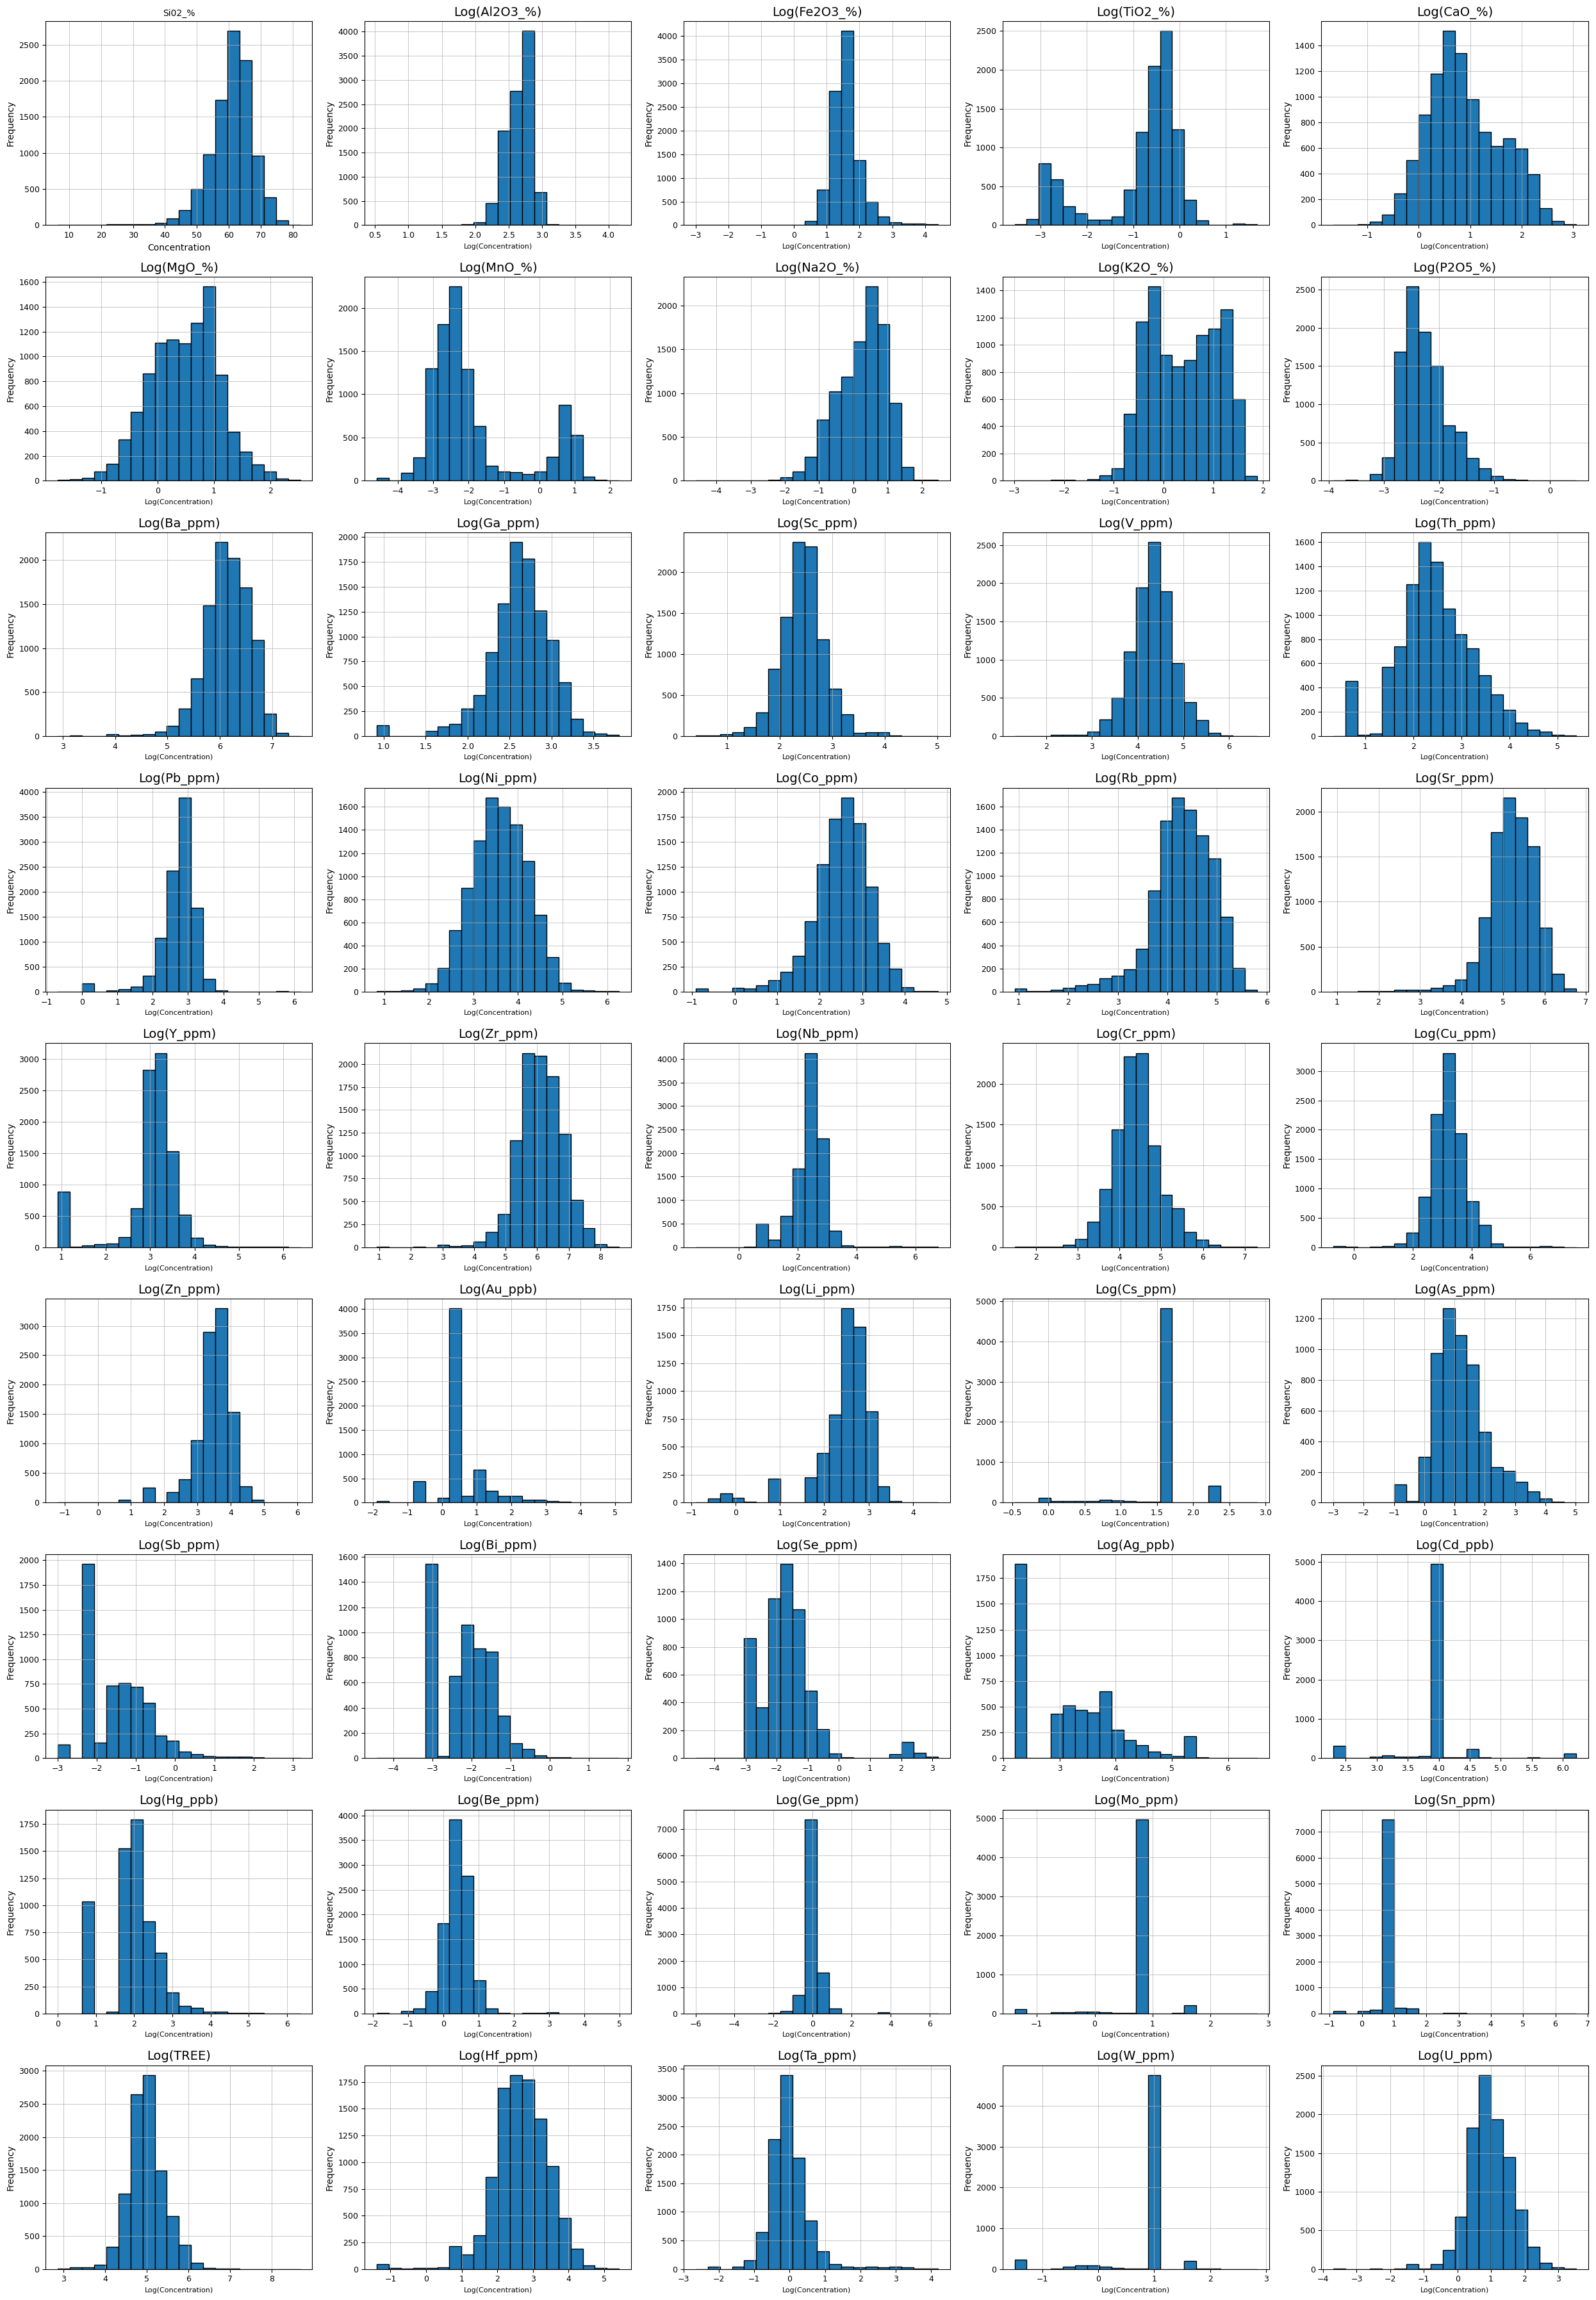

In [38]:
file_path = 'combined_selective_log_histograms.png'  # REPLACE with file anem to save the combined selectively log-transformed histogram image

num_elements = len(selective_log_normalized_df.columns)
if num_elements > 0:
    num_rows = int(np.ceil(num_elements / 5))
    num_cols = min(num_elements, 5) # Ensure no more than 5 columns

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows)) # Adjust figure size as needed
    axes = axes.flatten() # Flatten the axes array for easy indexing

    for i, column in enumerate(selective_log_normalized_df.columns):
        ax = axes[i]
        ax.hist(selective_log_normalized_df[column].dropna(), bins=20, edgecolor='black') # Adjusted bins
        if column in positive_skewed_elements:
            ax.set_title(f'Log({column})', fontsize=14) # Smaller title font with log notation
            ax.set_xlabel('Log(Concentration)', fontsize=8)
        else:
            ax.set_title(column, fontsize=10) # Smaller title font
            ax.set_xlabel('Concentration', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=9) # Smaller tick labels
        ax.grid(True, linewidth=0.5)

    # Remove any unused subplots if the number of elements is not a multiple of 5
    if num_elements < num_rows * num_cols:
        for i in range(num_elements, num_rows * num_cols):
            fig.delaxes(axes[i])

    plt.tight_layout()

    try:
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
        print(f"Combined selectively log-transformed histograms saved to: {file_path}")
    except Exception as e:
        print(f"Error saving combined selectively log-transformed histograms: {e}")

    plt.show()

else:
    print("No elements in the selective_log_normalized_df to plot histograms.")

Combined box plots saved to: combined_selective_log_boxplots.png


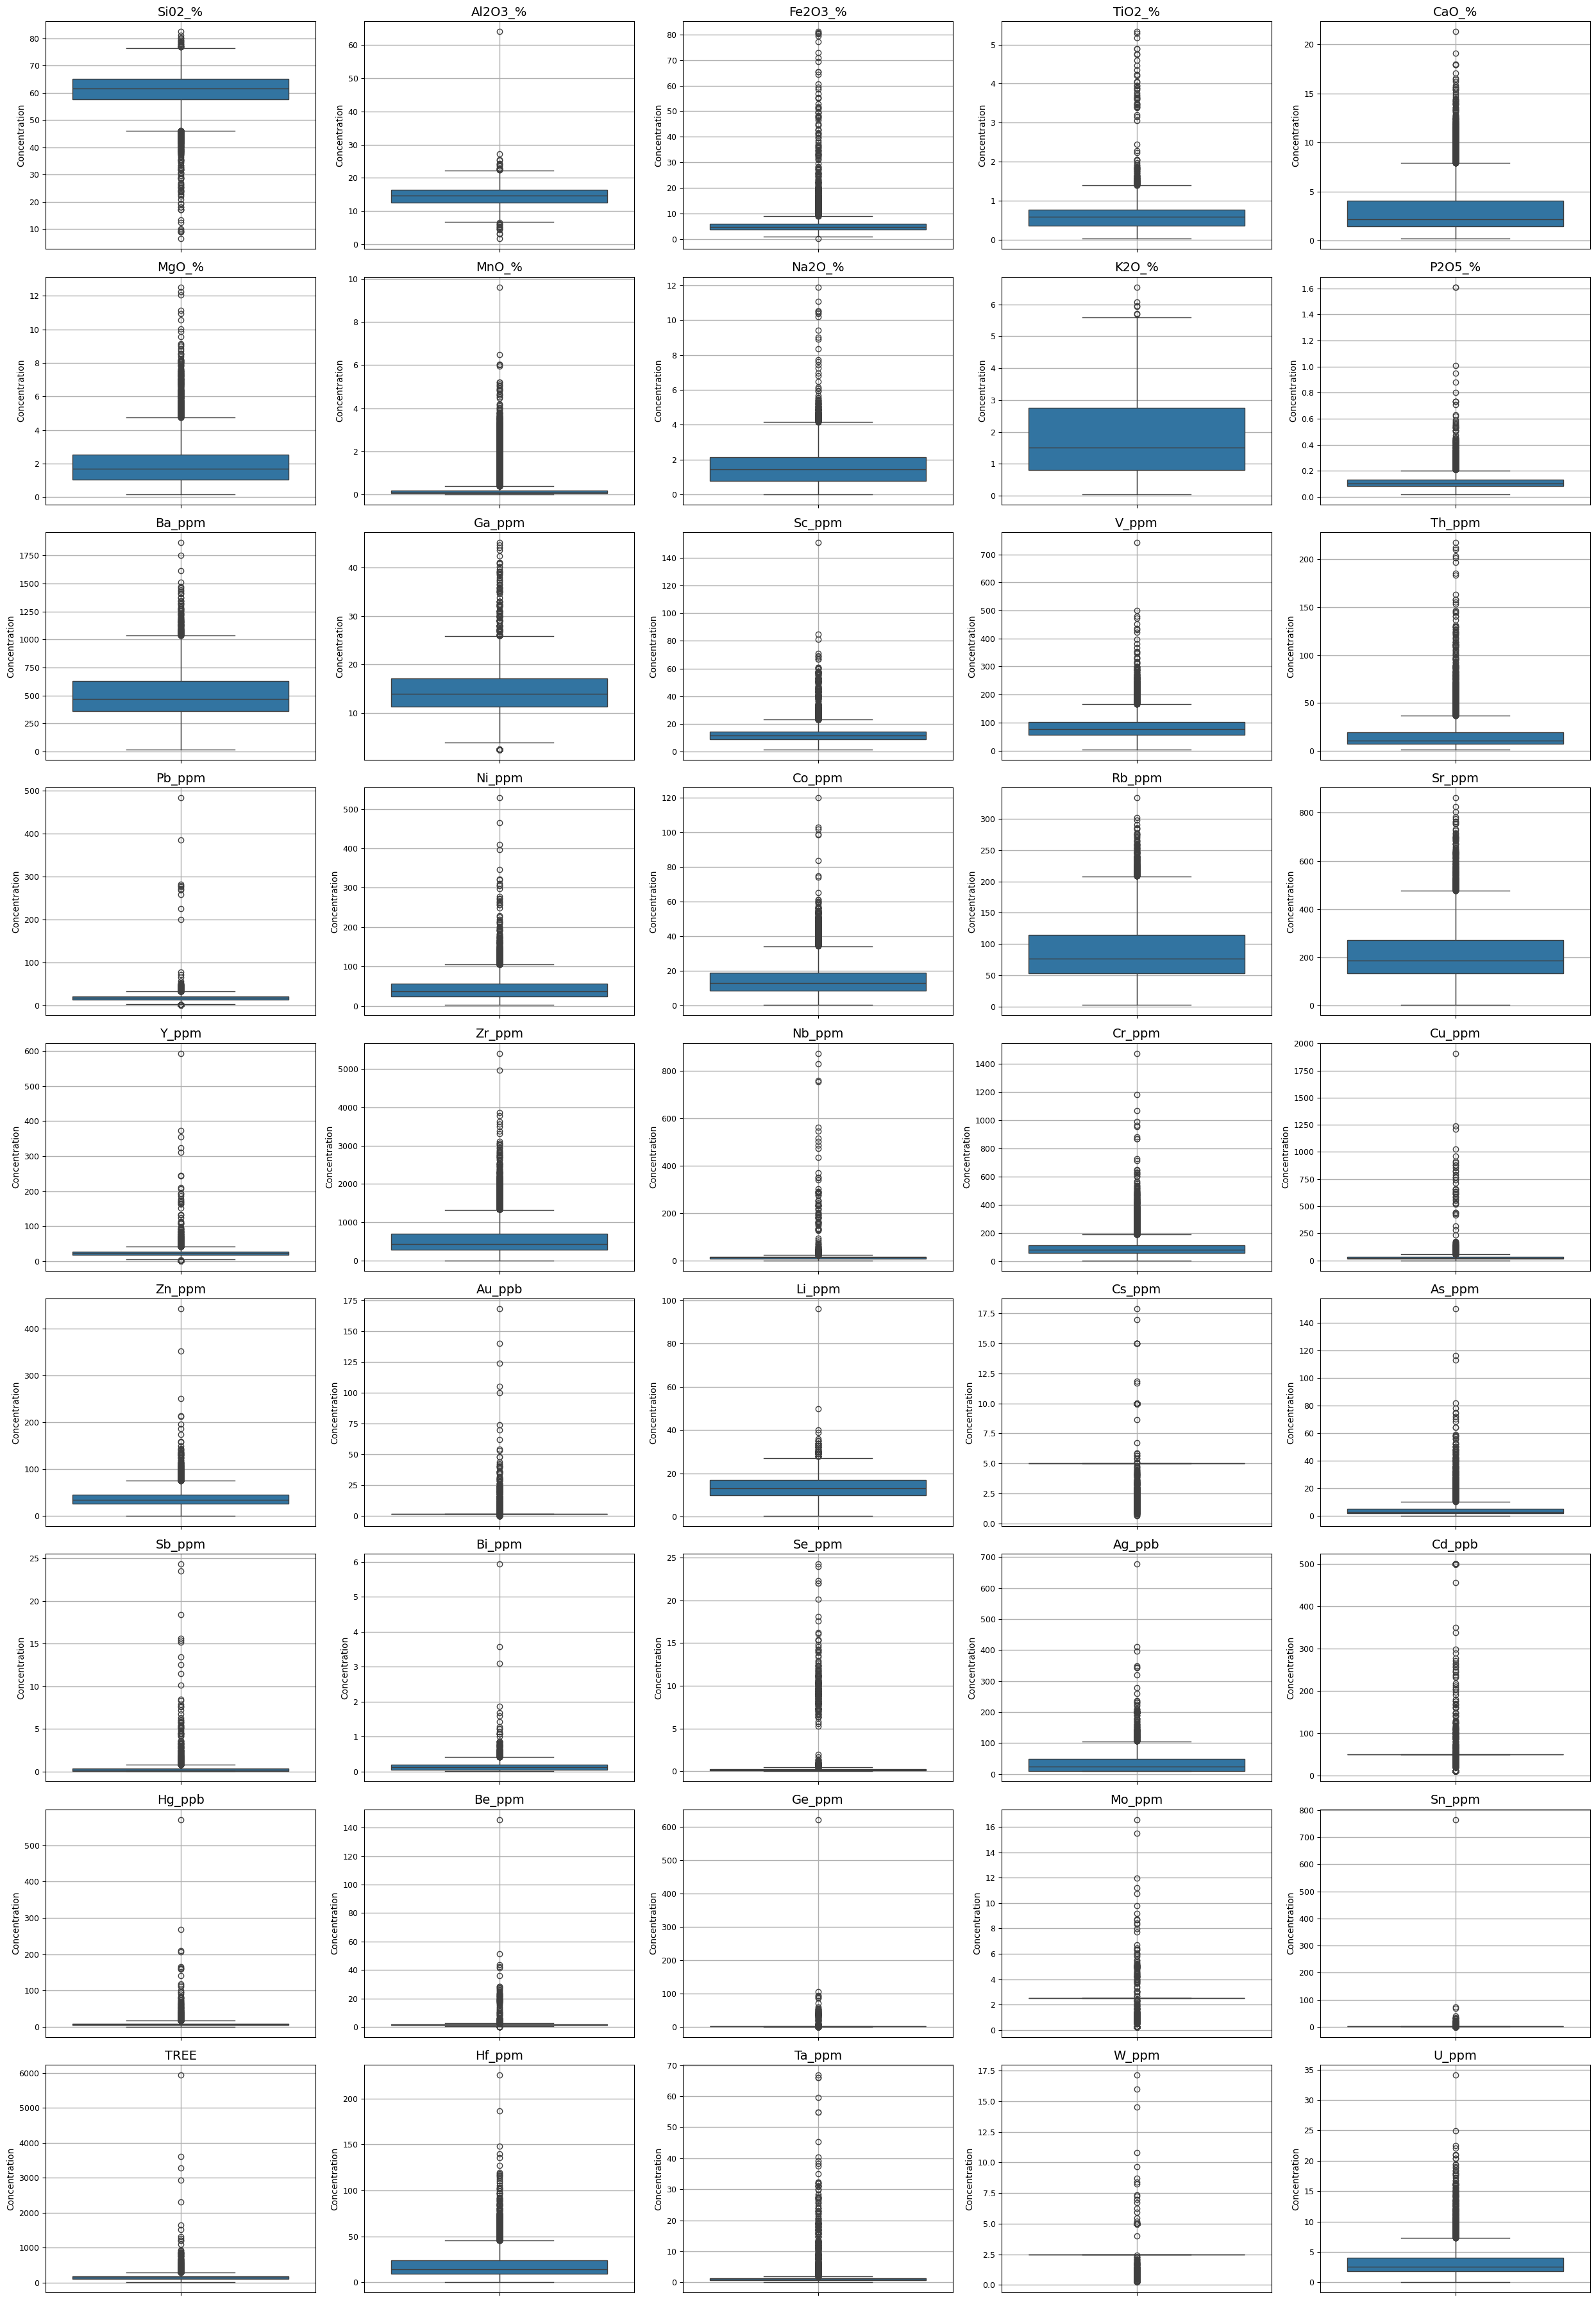

In [39]:
file_path = 'combined_selective_log_boxplots.png'            # REPLACE with your desired file name you want to save the combined box plot image

num_elements = len(selective_log_normalized_df.columns)
if num_elements > 0:
    num_rows = int(np.ceil(num_elements / 5))
    num_cols = min(num_elements, 5)                          # Ensure no more than 5 columns

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows)) # Adjust figure size as needed
    axes = axes.flatten() # Flatten the axes array for easy indexing

    for i, column in enumerate(selective_log_normalized_df.columns):
        ax = axes[i]
        sns.boxplot(y=eda_df[column], ax=ax)
        ax.set_title(column, fontsize=14) # Smaller title font
        ax.set_ylabel('Concentration', fontsize=10)
        ax.tick_params(axis='y', which='major', labelsize=9) # Smaller tick labels
        ax.grid(True, linewidth=1.0)

    # Remove any unused subplots if the number of elements is not a multiple of 5
    if num_elements < num_rows * num_cols:
        for i in range(num_elements, num_rows * num_cols):
            fig.delaxes(axes[i])

    plt.tight_layout()

    try:
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
        print(f"Combined box plots saved to: {file_path}")
    except Exception as e:
        print(f"Error saving combined box plots: {e}")

    plt.show()

else:
    print("No elements in the eda_df to plot box plots.")

In [41]:
# List of elements for PCA
elements_for_pca = ['Si02_%', 'Fe2O3_%', 'TiO2_%', 'CaO_%', 'MgO_%', 'Na2O_%', 'K2O_%', 'Ba_ppm', 'V_ppm', 'Th_ppm', 'Ni_ppm', 'Co_ppm', 'Rb_ppm', 
                    'Zr_ppm', 'Cr_ppm', 'Cu_ppm', 'Au_ppb', 'Hg_ppb', 'TREE', 'Hf_ppm']

pca_df = selective_log_normalized_df[elements_for_pca].copy()                  # Create a new DataFrame containing only the selected elements
print("First 5 rows of the DataFrame for PCA:")                                # Display the first few rows of the PCA DataFrame
print(pca_df.head())
print("\nInformation about the PCA DataFrame:")                                # Display basic information about the PCA DataFrame
pca_df.info()

First 5 rows of the DataFrame for PCA:
   Si02_%   Fe2O3_%    TiO2_%     CaO_%     MgO_%    Na2O_%     K2O_%  \
0   60.03  1.570697 -0.210721  1.108563  0.657520 -0.223144  0.470004   
1   58.85  1.591274 -0.235722  1.479329  0.815365 -0.941609 -0.261365   
2   65.12  1.465568 -0.356675  1.340250  0.625938 -0.342490  0.314811   
3   65.63  1.585145 -0.210721  1.007958  0.683097 -0.713350  0.019803   
4   54.15  1.605430 -0.248461  1.853168  0.760806 -0.693147  0.231112   

     Ba_ppm     V_ppm    Th_ppm    Ni_ppm    Co_ppm    Rb_ppm    Zr_ppm  \
0  6.109914  4.481872  3.126761  4.084294  2.928524  4.590057  5.971007   
1  6.075576  4.650144  2.484907  4.238445  2.906901  4.055257  5.791183   
2  6.109914  4.529368  2.975530  4.003690  2.895912  4.301359  6.225152   
3  5.924523  4.643429  2.954910  4.100989  3.025291  4.127134  6.409517   
4  6.196648  4.756173  2.174752  4.009150  2.879198  4.037774  5.803929   

     Cr_ppm    Cu_ppm    Au_ppb    Hg_ppb      TREE    Hf_ppm  
0  4.42

Plotting annotated correlation heatmap for PCA data...

Annotated correlation heatmap for PCA data saved as pca_correlation_heatmap_annotated.png


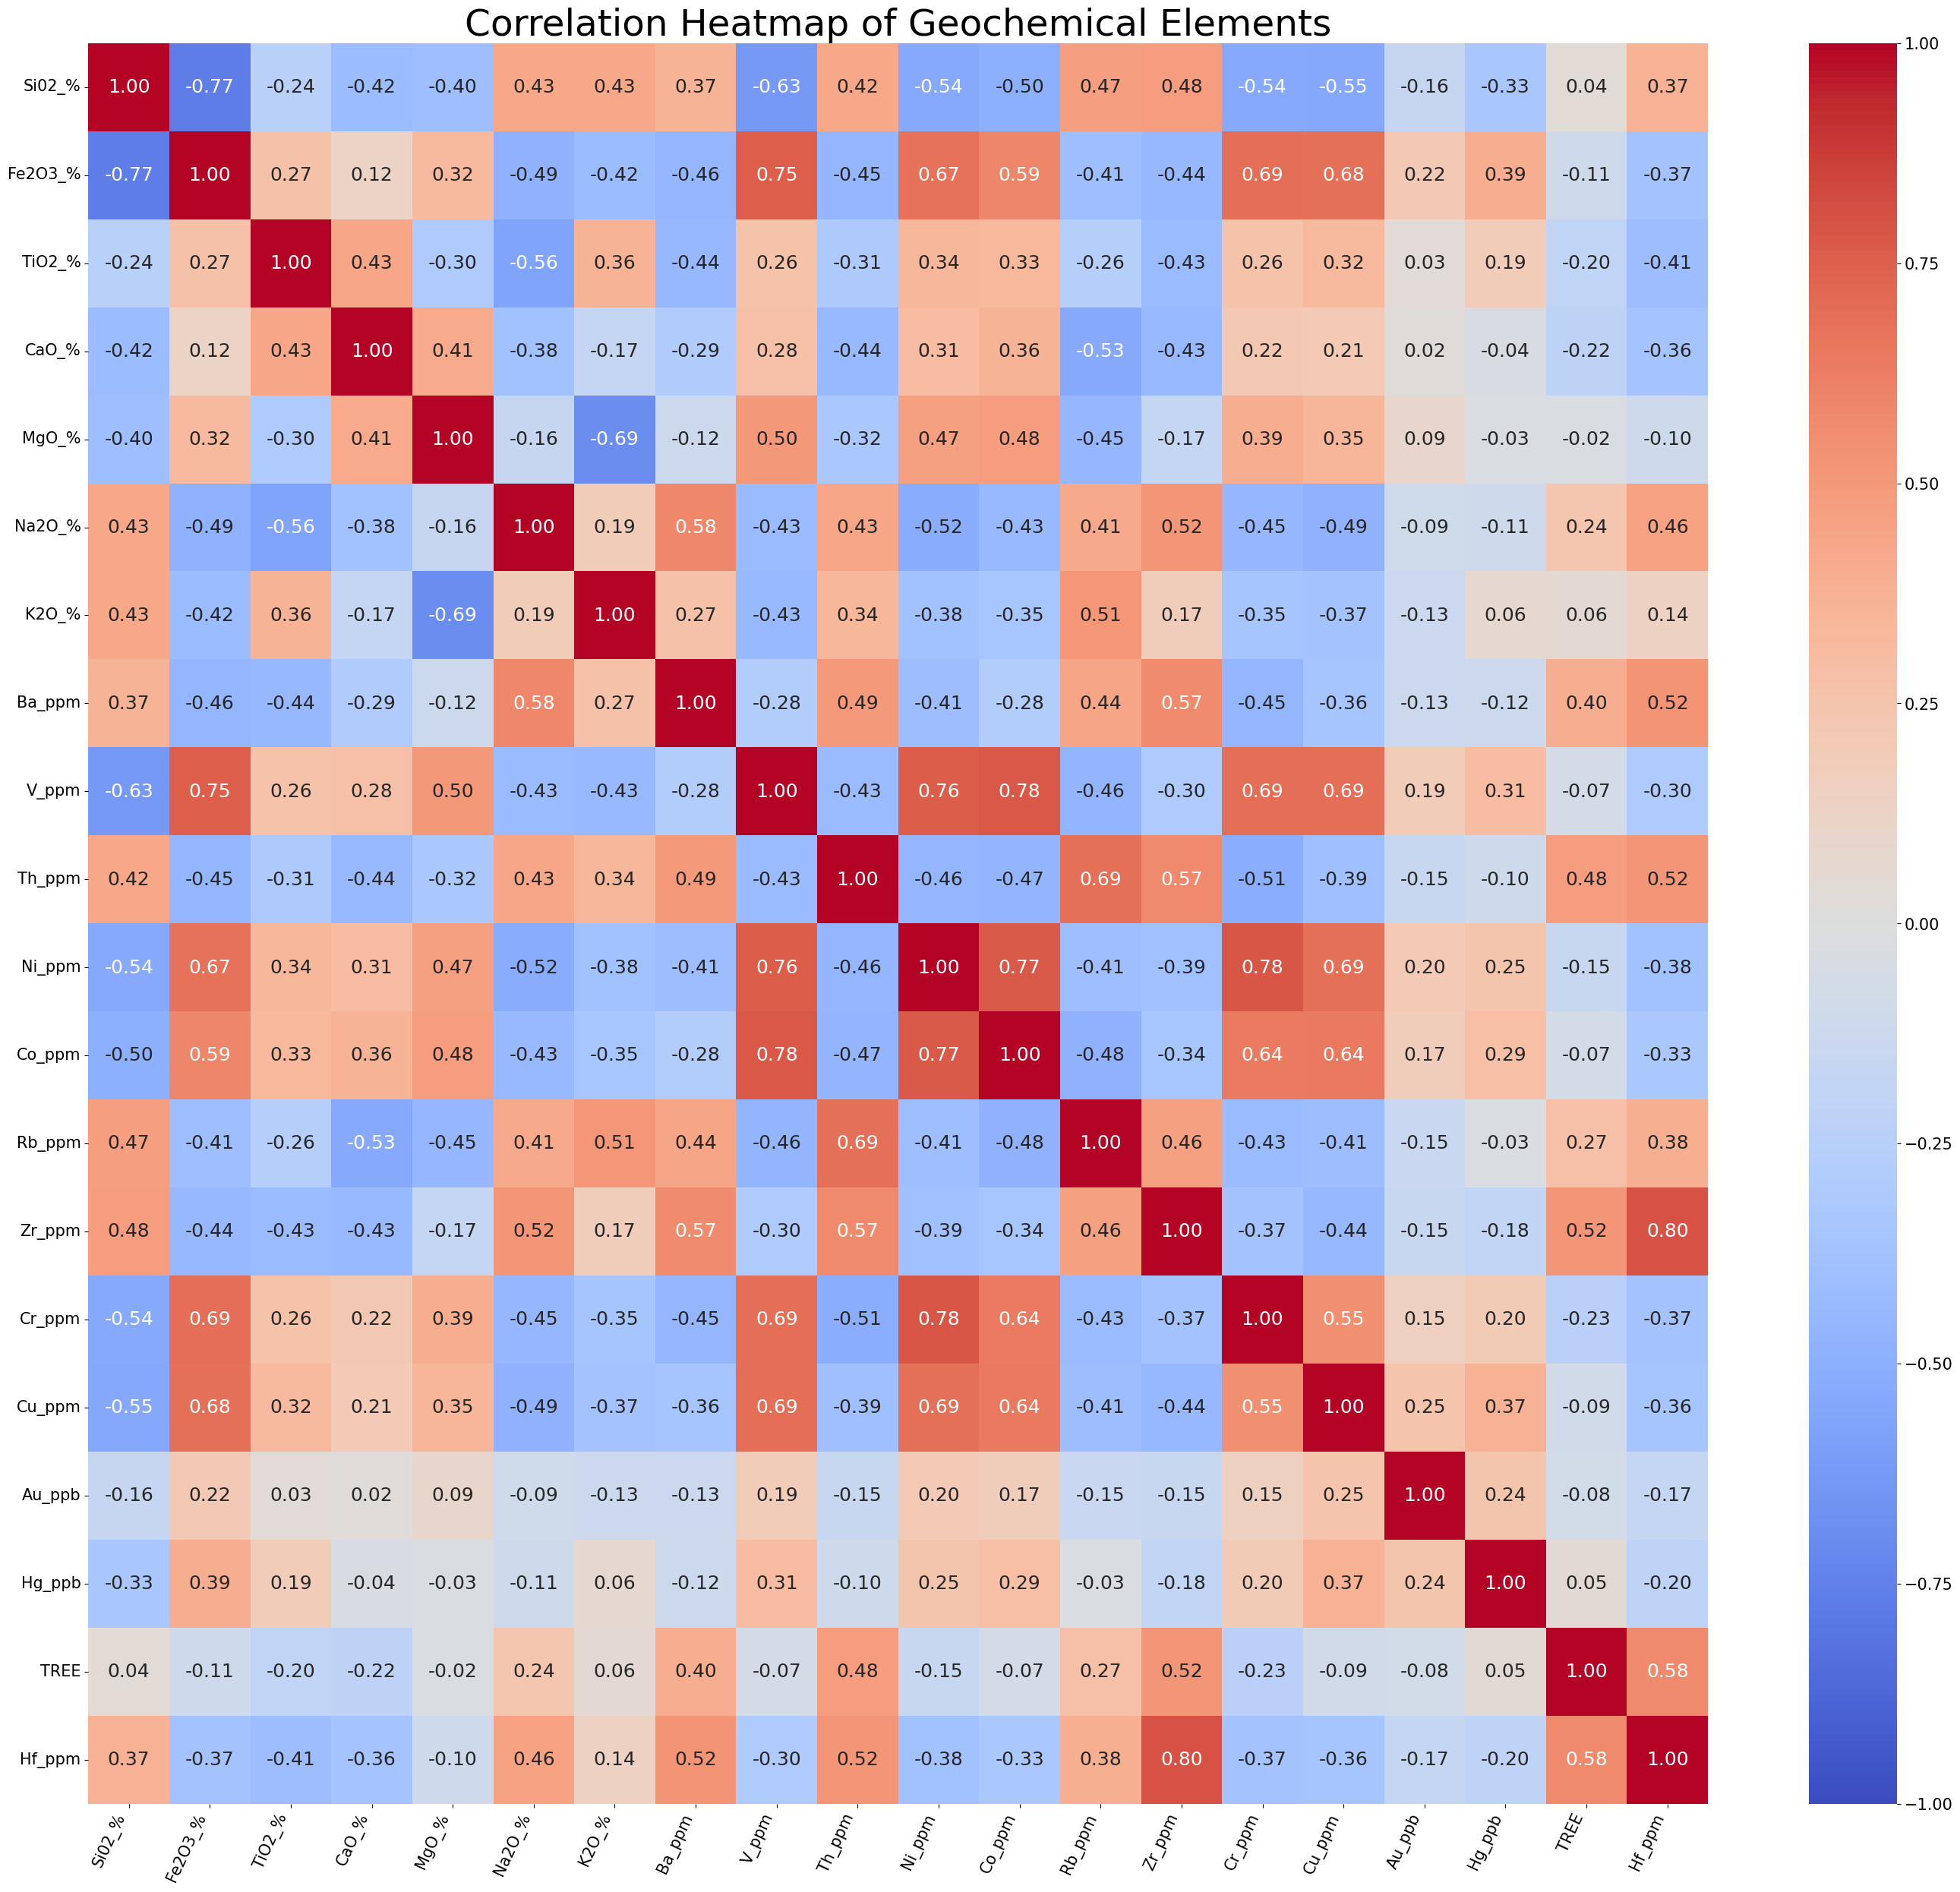

In [45]:
correlation_matrix_pca = pca_df.corr()                                       # Calculating and Saving Correlation Matrix for PCA Data
print("Plotting annotated correlation heatmap for PCA data...")
plt.figure(figsize=(28, 25))
ax = sns.heatmap(correlation_matrix_pca,
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        fmt=".2f",
        annot_kws={"size": 18})
       
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)                                     # Adjust this value as needed for the colorbar ticks
plt.title('Correlation Heatmap of Geochemical Elements', fontsize=35)
plt.xticks(rotation=65, ha='right', fontsize=15)                      # Increased x-tick font size
plt.yticks(rotation=0, fontsize=15)                                   # Increased y-tick font size
plt.tight_layout(pad=1.0)
heatmap_file = 'pca_correlation_heatmap_annotated.png'

try:
    plt.savefig(heatmap_file, dpi=300, bbox_inches='tight')
    print(f"\nAnnotated correlation heatmap for PCA data saved as {heatmap_file}")
except Exception as e:
    print(f"Error saving heatmap: {e}")

plt.show()

In [49]:
# --- Handling Missing Values using Imputation (Mean Imputation) ---
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(pca_df)

# Convert the imputed data back to a DataFrame
pca_df_imputed = pd.DataFrame(imputed_data, columns=pca_df.columns)

# Display the first few rows of the imputed PCA DataFrame
print("First 5 rows of the imputed DataFrame for PCA:")
print(pca_df_imputed.head())

# --- Scaling the imputed data ---
scaler = StandardScaler()
scaled_data_imputed = scaler.fit_transform(pca_df_imputed)

# --- Applying PCA ---
# Initialize PCA - keeping all components initially
pca = PCA()
pca.fit(scaled_data_imputed)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio of Principal Components:\n", explained_variance_ratio)

# --- Creating PCA scores DataFrame ---
pca_scores = pca.transform(scaled_data_imputed)
pca_columns = [f'PC{i+1}' for i in range(pca_scores.shape[1])]
pca_df_scores = pd.DataFrame(data=pca_scores, columns=pca_columns)

# Add Latitude and Longitude columns
if 'latitude_col' in locals() and 'longitude_col' in locals() and longitude_col in geochem_df.columns and latitude_col in geochem_df.columns:
    pca_df_scores.insert(0, latitude_col, geochem_df[latitude_col].values)
    pca_df_scores.insert(0, longitude_col, geochem_df[longitude_col].values)
    print("\nLatitude and Longitude columns added to PCA scores.")
else:
    print("\nWarning: Latitude or Longitude column names not found or original DataFrame 'geochem_df' not accessible. Latitude and Longitude not added to PCA scores.")

# --- Saving PCA scores to CSV ---
pca_scores_path = 'pca_scores.csv'  # REPLACE with your desired file path
try:
    pca_df_scores.to_csv(pca_scores_path, index=False)
    print(f"\nPCA scores saved to: {pca_scores_path}")
except Exception as e:
    print(f"Error saving PCA scores to CSV: {e}")

First 5 rows of the imputed DataFrame for PCA:
   Si02_%   Fe2O3_%    TiO2_%     CaO_%     MgO_%    Na2O_%     K2O_%  \
0   60.03  1.570697 -0.210721  1.108563  0.657520 -0.223144  0.470004   
1   58.85  1.591274 -0.235722  1.479329  0.815365 -0.941609 -0.261365   
2   65.12  1.465568 -0.356675  1.340250  0.625938 -0.342490  0.314811   
3   65.63  1.585145 -0.210721  1.007958  0.683097 -0.713350  0.019803   
4   54.15  1.605430 -0.248461  1.853168  0.760806 -0.693147  0.231112   

     Ba_ppm     V_ppm    Th_ppm    Ni_ppm    Co_ppm    Rb_ppm    Zr_ppm  \
0  6.109914  4.481872  3.126761  4.084294  2.928524  4.590057  5.971007   
1  6.075576  4.650144  2.484907  4.238445  2.906901  4.055257  5.791183   
2  6.109914  4.529368  2.975530  4.003690  2.895912  4.301359  6.225152   
3  5.924523  4.643429  2.954910  4.100989  3.025291  4.127134  6.409517   
4  6.196648  4.756173  2.174752  4.009150  2.879198  4.037774  5.803929   

     Cr_ppm    Cu_ppm    Au_ppb    Hg_ppb      TREE    Hf_ppm  


PCA Scree Plot saved to: pca_scree_plot.png


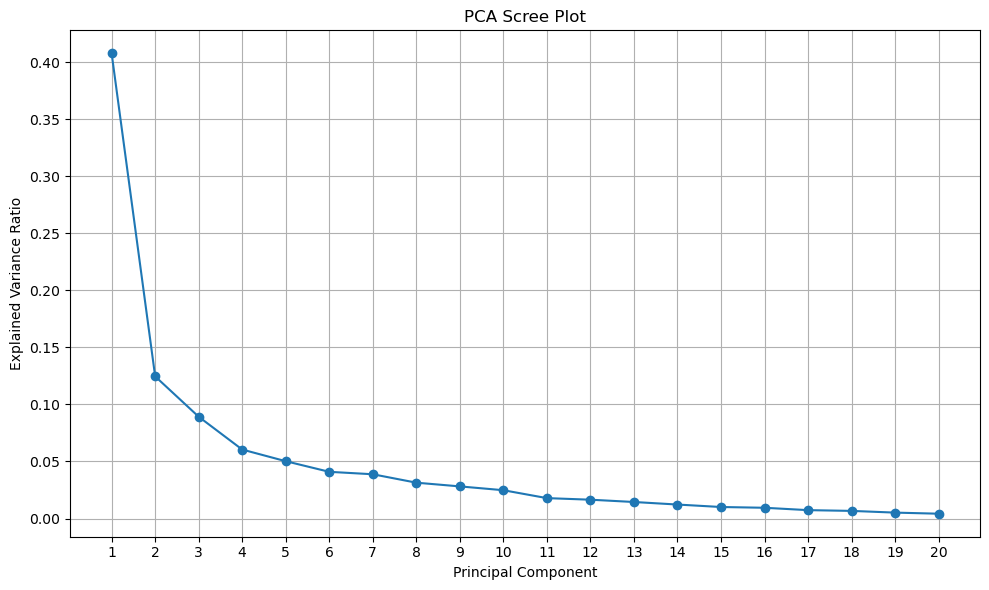

In [50]:
# Cell 23: PCA Scree Plot

import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.tight_layout()

# --- Saving Scree Plot to PNG ---
scree_plot_path = 'pca_scree_plot.png'  # REPLACE with your desired file path
try:
    plt.savefig(scree_plot_path, dpi=300, bbox_inches='tight')
    print(f"\nPCA Scree Plot saved to: {scree_plot_path}")
except Exception as e:
    print(f"Error saving PCA Scree Plot: {e}")

plt.show()


PCA Loadings Heatmap saved to: pca_loadings_heatmap.png


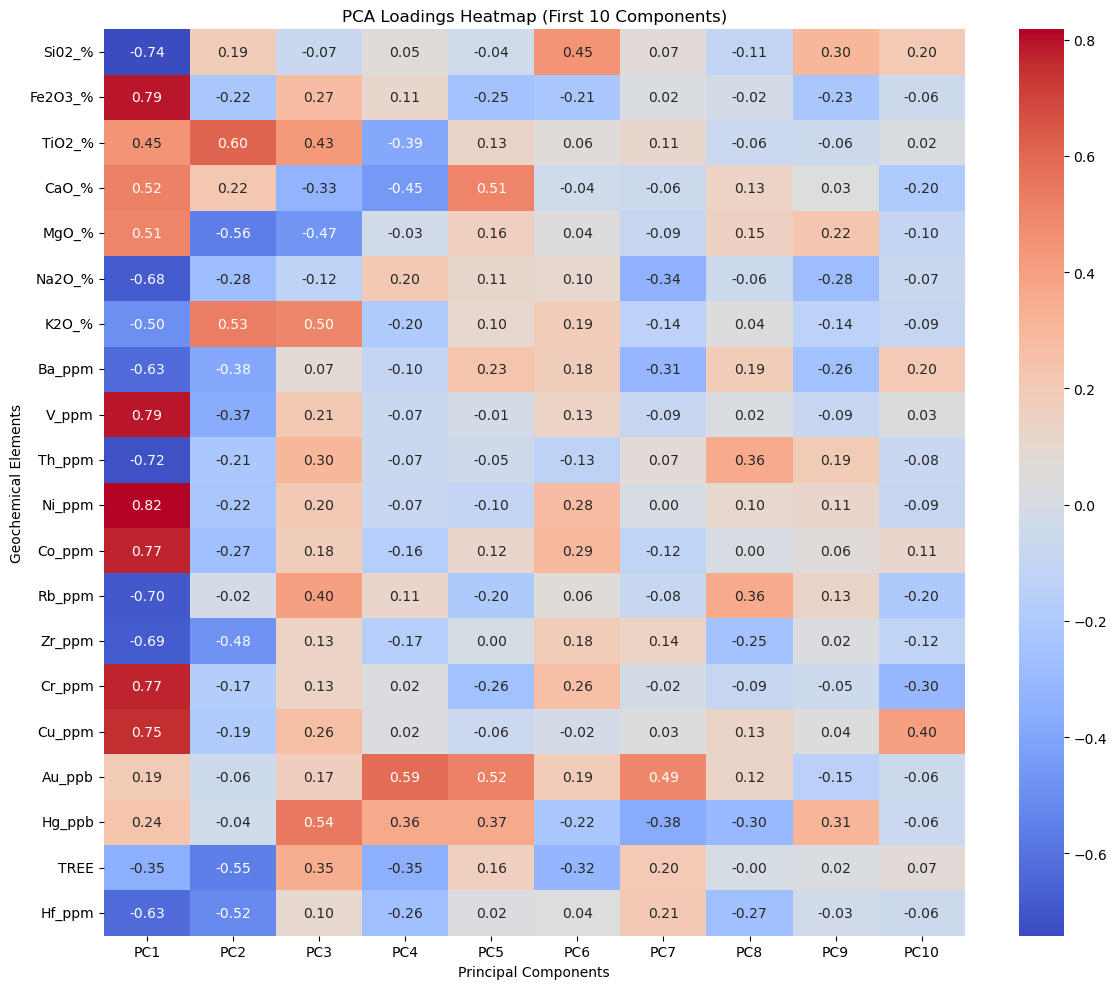

In [51]:
# --- Generating PCA Heatmap (Loadings) ---
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=pca_columns, index=elements_for_pca)

plt.figure(figsize=(12, 10))
sns.heatmap(loadings_df.iloc[:, :10], annot=True, cmap='coolwarm', fmt=".2f") # Showing first 5 components for brevity
plt.title('PCA Loadings Heatmap (First 10 Components)')
plt.ylabel('Geochemical Elements')
plt.xlabel('Principal Components')
plt.tight_layout()

# --- Saving PCA Heatmap to PNG ---
pca_heatmap_path = 'pca_loadings_heatmap.png'  # REPLACE with your desired file path
try:
    plt.savefig(pca_heatmap_path, dpi=300, bbox_inches='tight')
    print(f"\nPCA Loadings Heatmap saved to: {pca_heatmap_path}")
except Exception as e:
    print(f"Error saving PCA Loadings Heatmap: {e}")

plt.show()